<a href="https://colab.research.google.com/github/TheMGR111/aiPoweredInvestments/blob/main/Homework2/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Due 11:59pm on Monday 1/26/2026

Finance 372T/397 "AI Powered Investments \
Professor Travis Johnson \
McCombs School of Business, The University of Texas at Austin

Do not edit the cells with the instructions. [***Complete anything in brackets***] and feel free to add additional cells if needed.

## Grading

You are graded on:
- Final outputs you submit
- The quality of your interpretation and judgment
- Whether final results are internally consistent and economically sensisble

You are *not* graded on whether the AI's first attempt was fully correct. As you'll see, we want to you report the results from your first attempt and what you noticed that needed improvment.

## Deliverable

You will submit your notebook as an .html file. Instructions for converting are in your final "Task" below

## Solution By

**Name:** Martin Rodriguez

**EID:** mgr2696

In [1]:
################################################
# RUN THIS CELL TO LOAD ANNUAL RETURN DATA FOR 5 DIFFERENT INVESTMENTS:
# Mkt (US equity market), A, B, C, and D
################################################

# Use "Explain Code" AI tool if you're curious about what this is doing
import pandas as pd

url = (
    "https://raw.githubusercontent.com/"
    "travlake/ai-investments-course/"
    "main/Homework2/return_data.csv"
)

ret_df = pd.read_csv(url, parse_dates=['Year'])

# returns are in percent, to avoid confusion divide by 100 (all but Year column)
ret_df.iloc[:, 1:] = ret_df.iloc[:, 1:] / 100
ret_df.head()

# the "Year" column dates should really be end of year instead of beginning
ret_df['Year'] = ret_df['Year'] + pd.offsets.YearEnd()
ret_df.head()

,Year,Mkt,A,B,C,D
0,1927-12-31,0.3256,0.522736,0.292366,0.438115,0.390046
1,1928-12-31,0.3912,0.103471,0.383491,0.460448,0.740219
2,1929-12-31,-0.1483,-0.515984,0.009834,-0.215290,-0.449289
3,1930-12-31,-0.2873,-0.528624,-0.737924,-0.270523,-0.490187
4,1931-12-31,-0.4377,-0.798961,-0.416031,-0.369225,-0.517621


# Part 1: Mean-variance investors (in-class)

## Task 1: Visualize portfolios combining two investments

### Detailed Specification ("Spec")
We would like a plot showing portfolio standard deviation on the x axis and portfolio expected return on the y axis for a range of portfolios combining two investments.

So we can investigate a variety of assumptions, write a function `plot_two_asset_frontier` that takes as input: mu_A, sigma_A, mu_B, sigma_b, rho, and w_bounds. mu_i is i's expected return, sigma_i is i's volatility, rho is the correlation between the two, and w_bounds gives the bounds for allowable weights (e.g. w_bounds = [0,1] or [-1,2]).

Consider 500 different weights inside the bounds.

The plot should include:
- Dots for A and B alone with text labels on the plot. These should **not** be included in the legend.
- A solid line for the *efficient frontier* (portfolios that are mean-variance efficient)
- A dotted line for the mean-variance inefficient portfolios

Convert each axis to a % (multiply by 100)

The plot axes should start at (0,0). To make frontiers more comparable across varying assumptions about rho, the x axis should always go to 1.5*(maximum of sigma_A% and sigma_B%).

Once you have this function, plot for assets A and B inside `ret_df`. Initially plot using their actual correlations, then make plots adjusting correlation to 1, 0, and -1. Use bounds = [-1,2] for the plots.

**Make sure all four plots are visible in the notebook output**

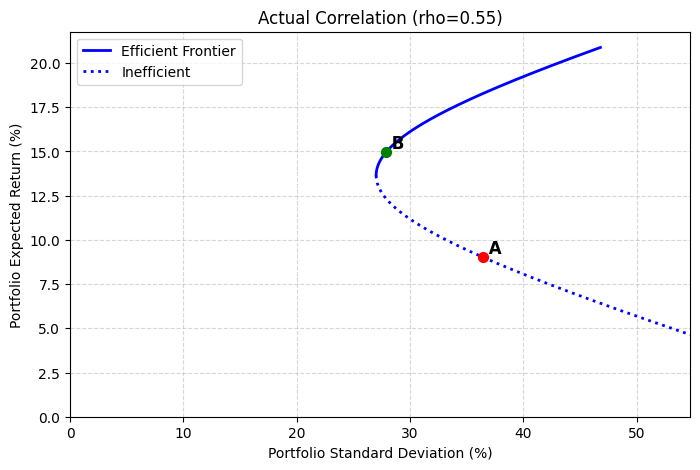

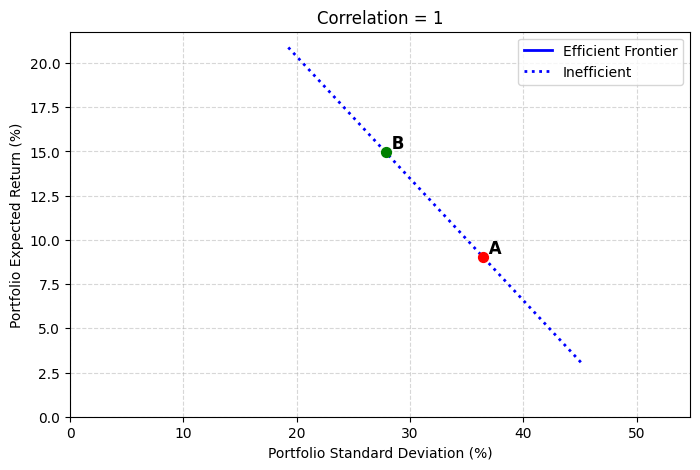

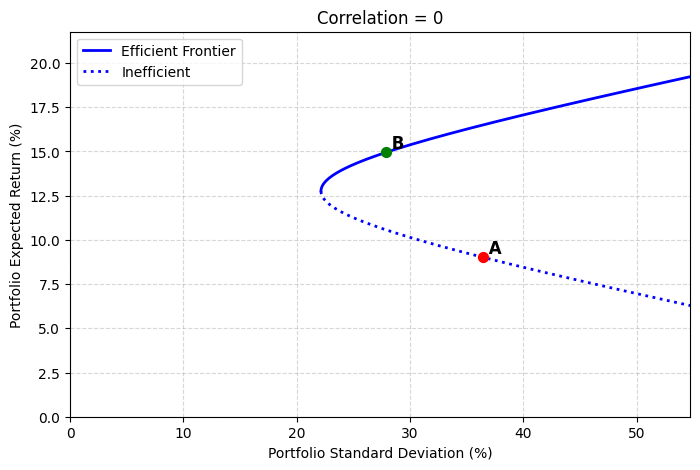

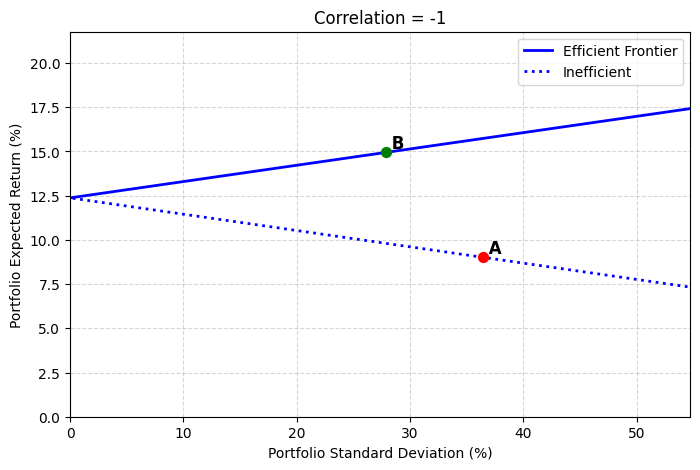

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
url = (
    "https://raw.githubusercontent.com/"
    "travlake/ai-investments-course/"
    "main/Homework2/return_data.csv"
)

ret_df = pd.read_csv(url, parse_dates=['Year'])

# Returns are in percent, divide by 100
ret_df.iloc[:, 1:] = ret_df.iloc[:, 1:] / 100

# Fix Year to end of year
ret_df['Year'] = ret_df['Year'] + pd.offsets.YearEnd()

# --- 2. Define Plotting Function ---
def plot_two_asset_frontier(mu_A, sigma_A, mu_B, sigma_B, rho, w_bounds, title=None):
    """
    Plots the mean-variance efficient frontier for two assets.
    """
    # Generate weights
    w_A = np.linspace(w_bounds[0], w_bounds[1], 500)
    w_B = 1 - w_A

    # Portfolio Statistics
    # Expected Return
    port_mu = w_A * mu_A + w_B * mu_B

    # Volatility
    port_var = (w_A**2 * sigma_A**2 +
                w_B**2 * sigma_B**2 +
                2 * w_A * w_B * sigma_A * sigma_B * rho)
    port_sigma = np.sqrt(port_var)

    # Find Minimum Variance Portfolio (MVP) to split Efficient vs Inefficient
    # Analytical solution for w_A at MVP:
    cov_AB = rho * sigma_A * sigma_B
    denom = sigma_A**2 + sigma_B**2 - 2*cov_AB

    if np.isclose(denom, 0): # Edge case: rho=1 and equal sigmas
        # Just find the min in our discrete array
        mvp_mu = port_mu[np.argmin(port_sigma)]
    else:
        w_A_mvp = (sigma_B**2 - cov_AB) / denom
        mvp_mu = w_A_mvp * mu_A + (1 - w_A_mvp) * mu_B

    # Classify points
    # Efficient: Return >= MVP Return
    is_efficient = port_mu >= (mvp_mu - 1e-8)

    # Convert to Percent for display
    X_pct = port_sigma * 100
    Y_pct = port_mu * 100
    sigma_A_pct = sigma_A * 100
    mu_A_pct = mu_A * 100
    sigma_B_pct = sigma_B * 100
    mu_B_pct = mu_B * 100

    # --- Plotting ---
    # Create figure (using standard matplotlib approach)
    fig, ax = plt.subplots(figsize=(8, 5))

    # Efficient Frontier (Solid)
    ax.plot(X_pct[is_efficient], Y_pct[is_efficient],
            linestyle='-', linewidth=2, color='blue', label='Efficient Frontier')

    # Inefficient Frontier (Dotted)
    ax.plot(X_pct[~is_efficient], Y_pct[~is_efficient],
            linestyle=':', linewidth=2, color='blue', label='Inefficient')

    # Dots for A and B (No label in legend, but text on plot)
    ax.scatter([sigma_A_pct], [mu_A_pct], color='red', s=50, zorder=5)
    ax.text(sigma_A_pct, mu_A_pct, ' A', fontsize=12, verticalalignment='bottom', weight='bold')

    ax.scatter([sigma_B_pct], [mu_B_pct], color='green', s=50, zorder=5)
    ax.text(sigma_B_pct, mu_B_pct, ' B', fontsize=12, verticalalignment='bottom', weight='bold')

    # Axes Formatting
    ax.set_xlabel('Portfolio Standard Deviation (%)')
    ax.set_ylabel('Portfolio Expected Return (%)')
    ax.set_title(title if title else f'Portfolio Frontier (rho = {rho})')

    # Limits: Start at 0,0. Max X is 1.5 * max asset volatility
    max_sig = max(sigma_A_pct, sigma_B_pct)
    ax.set_xlim(0, 1.5 * max_sig)
    ax.set_ylim(bottom=0)

    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# --- 3. Execute Plots ---

# Calculate Inputs
mu_A = ret_df['A'].mean()
sigma_A = ret_df['A'].std()
mu_B = ret_df['B'].mean()
sigma_B = ret_df['B'].std()
actual_rho = ret_df['A'].corr(ret_df['B'])

bounds = [-1, 2]

# 1. Actual Correlation
plot_two_asset_frontier(mu_A, sigma_A, mu_B, sigma_B, actual_rho, bounds,
                        title=f'Actual Correlation (rho={actual_rho:.2f})')

# 2. Correlation = 1
plot_two_asset_frontier(mu_A, sigma_A, mu_B, sigma_B, 1, bounds,
                        title='Correlation = 1')

# 3. Correlation = 0
plot_two_asset_frontier(mu_A, sigma_A, mu_B, sigma_B, 0, bounds,
                        title='Correlation = 0')

# 4. Correlation = -1
plot_two_asset_frontier(mu_A, sigma_A, mu_B, sigma_B, -1, bounds,
                        title='Correlation = -1')

## Task 2: Visualize efficient frontier with N assets

Our goal is to make a plot that looks like this:

[frontier.png](https://github.com/travlake/ai-investments-course/blob/main/Homework2/frontier.png)

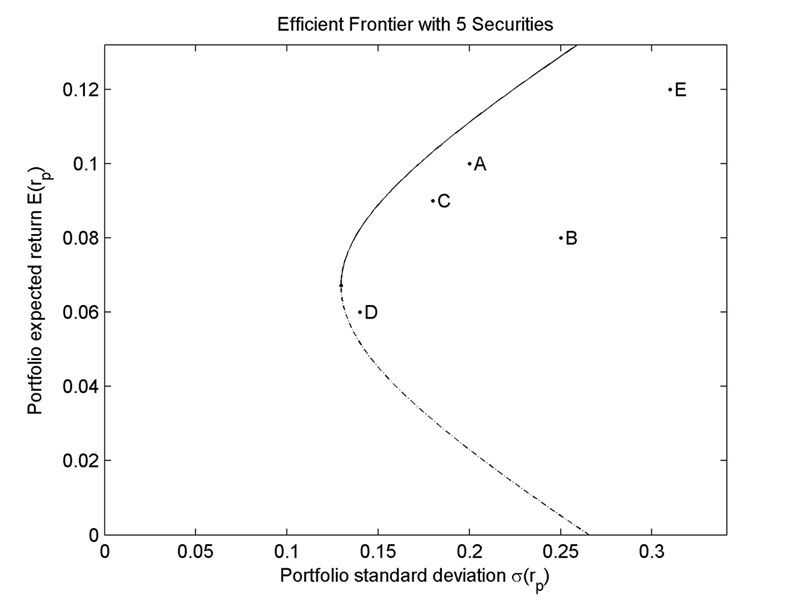

But for the five assets (Mkt, A, B, C, D) in `ret_df`. Your code should work more generally for any set of `N` assets in `ret_df`, not just exactly 5.

You should again allow for

### Suggested approaches:
1) Write a detailed spec, as I gave you for Task 1, then tell Gemini to write the code.
1) Copy the image and paste it into a "multimodal" LLM model like Gemini 3 or ChatGPT 5. Ask it to write the code based on this. You will still need to provide some of the spec for this to work well.

Regardless of your approach, you will likely need to ask Gemini to edit/revise its first attempt.

Changes from the provided Figure:
1) Please **use % scales for both axes**
1) Add a legend

Small formatting changes are OK too as long as they are legible, look good, and retain the core concepts.


Test 2 Spec:

Thanks. Now I want a graph similar to the one I uploaded, like for five assets (Mkt, A, B, C, D) in ret_df. Your code should work more generally for any set of N assets in ret_df, not just exactly 5. Also, Please use % scales for both axes and add a legend.

/tmp/ipython-input-2474891181.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(asset_sigma_pct[i] + 0.2, asset_mu_pct[i], name,


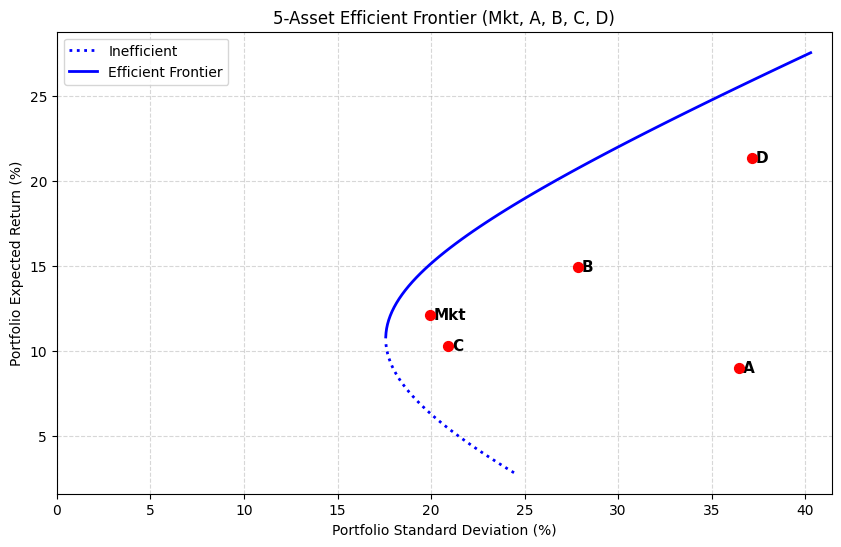

In [7]:
# Task 2 response (code):
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function Definition ---

def plot_n_asset_frontier(ret_df, title="Efficient Frontier"):
    """
    Plots the Mean-Variance Efficient Frontier for N assets in ret_df.
    Assumes standard unconstrained optimization (short sales allowed).
    """
    # 1. Prepare Data
    # Drop 'Year' column if it exists to get just the asset returns
    if 'Year' in ret_df.columns:
        assets_df = ret_df.drop(columns=['Year'])
    else:
        assets_df = ret_df

    mu = assets_df.mean()
    Sigma = assets_df.cov()
    N = len(mu)
    asset_names = assets_df.columns

    # 2. Generate the Frontier Line
    # We solve the Lagrangian for weights w that minimize variance for a target return r:
    # System: [ 2Sigma  Mu   1 ] [ w  ]   [ 0 ]
    #         [ Mu.T    0    0 ] [ l1 ] = [ r ]
    #         [ 1.T     0    0 ] [ l2 ]   [ 1 ]

    # Construct the Left-Hand Side (LHS) matrix (Constant)
    # Block matrix construction
    A_mat = 2 * Sigma.values
    # Add columns for constraints (Mu and 1s)
    A_mat = np.hstack([A_mat, mu.values.reshape(-1, 1), np.ones((N, 1))])
    # Add rows for constraints
    row_mu = np.concatenate([mu.values, [0, 0]])
    row_ones = np.concatenate([np.ones(N), [0, 0]])
    A_mat = np.vstack([A_mat, row_mu, row_ones])

    # Invert LHS once (Pseudo-inverse is safer for stability)
    A_inv = np.linalg.pinv(A_mat)

    # Define range of target returns (Y-axis)
    # We span slightly wider than the min/max individual asset returns
    min_mu, max_mu = mu.min(), mu.max()
    spread = max_mu - min_mu
    target_returns = np.linspace(min_mu - 0.5 * spread, max_mu + 0.5 * spread, 100)

    frontier_sigmas = []

    # Solve for each target return
    for r in target_returns:
        # Create Right-Hand Side (RHS) vector: [0...0, r, 1]
        rhs = np.zeros(N + 2)
        rhs[N] = r      # Constraint: w @ mu = r
        rhs[N+1] = 1    # Constraint: w @ 1 = 1

        # Solve for weights [w, lambda1, lambda2]
        solution = A_inv @ rhs
        w_opt = solution[:N]

        # Calculate portfolio volatility (sigma)
        var_p = w_opt @ Sigma.values @ w_opt
        frontier_sigmas.append(np.sqrt(var_p))

    frontier_sigmas = np.array(frontier_sigmas)

    # 3. Identify Efficient vs Inefficient Segments
    # The Minimum Variance Portfolio (MVP) is the vertex (leftmost point)
    mvp_idx = np.argmin(frontier_sigmas)
    mvp_return = target_returns[mvp_idx]

    is_efficient = target_returns >= mvp_return

    # 4. Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Convert to percentages for axes
    X_pct = frontier_sigmas * 100
    Y_pct = target_returns * 100
    asset_mu_pct = mu * 100
    asset_sigma_pct = np.sqrt(np.diag(Sigma)) * 100

    # Plot Inefficient Frontier (Dotted)
    ax.plot(X_pct[~is_efficient], Y_pct[~is_efficient],
            color='blue', linestyle=':', linewidth=2, label='Inefficient')

    # Plot Efficient Frontier (Solid)
    ax.plot(X_pct[is_efficient], Y_pct[is_efficient],
            color='blue', linestyle='-', linewidth=2, label='Efficient Frontier')

    # Plot Individual Assets
    ax.scatter(asset_sigma_pct, asset_mu_pct, color='red', s=50, zorder=5)

    # Label Assets
    for i, name in enumerate(asset_names):
        ax.text(asset_sigma_pct[i] + 0.2, asset_mu_pct[i], name,
                fontsize=11, verticalalignment='center', weight='bold')

    # Formatting
    ax.set_xlabel('Portfolio Standard Deviation (%)')
    ax.set_ylabel('Portfolio Expected Return (%)')
    ax.set_title(title)
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Ensure axes start at 0 (or close to relevant area, but user asked for % scales)
    ax.set_xlim(left=0)
    # Optional: set Y limit to view relevant area better if 0 is too far away
    # ax.set_ylim(bottom=0)

    plt.show()

# --- Execution ---

# 1. Run for the 5 assets in your dataframe
plot_n_asset_frontier(ret_df, title="5-Asset Efficient Frontier (Mkt, A, B, C, D)")

## Task 3: Visualize tangency portfolio

Our goal is to make a plot that looks like this:

[frontier.png](https://github.com/travlake/ai-investments-course/blob/main/Homework2/risky_rf_tangency.png)

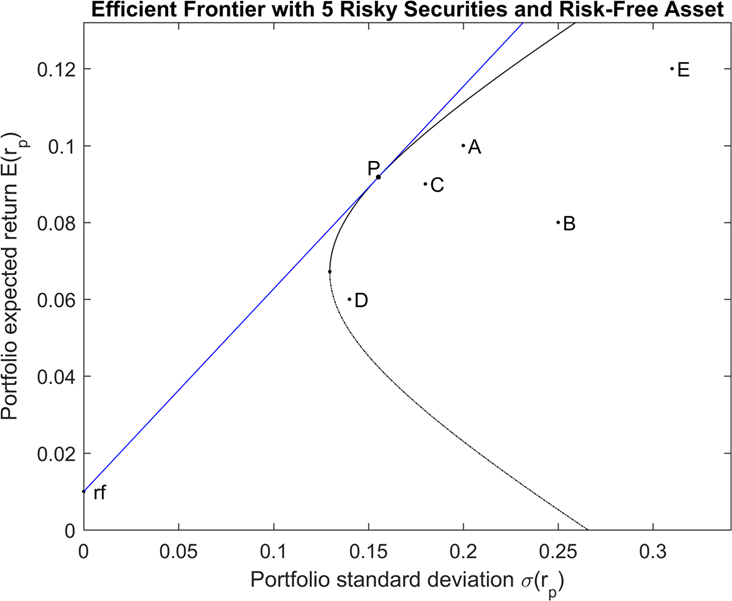

Make sure you code allows for a variety of assumptions about the risk-free rate $r_f$

Feel free to modify your solution to Task 2, but please leave Task 2 code as-is and copy below before modifying.

Changes from the provided Figure:
1) Please **use % scales for both axes**
1) Add a legend

Small formatting changes are OK too as long as they are legible, look good, and retain the core concepts.


Task 3 Spec:

Please now include a risk free rate and generate code similar to the image uploaded. Please make some assumptions of what the risk free rate could be according to today's possibilities.

Make sure you code allows for a variety of assumptions about the risk-free rate (r
f)
Feel free to modify your solution to Task 2, but please leave Task 2 code as-is and copy below before modifying.
Changes from the provided Figure:
Please use % scales for both axes
Add a legend

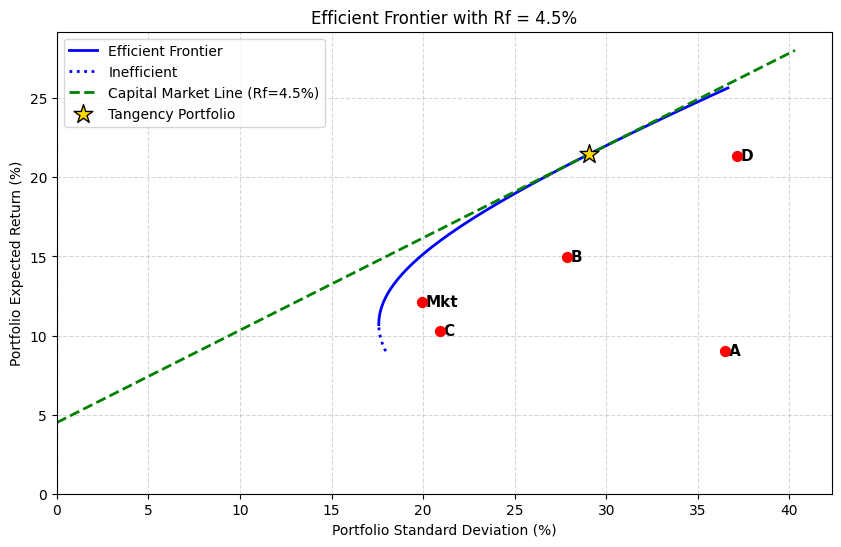

In [8]:
# Task 3 response (code):
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Function Definition ---

def plot_frontier_with_cml(ret_df, rf=0.045, title="Efficient Frontier & CML"):
    """
    Plots the N-asset efficient frontier, the Capital Market Line (CML),
    and the Tangency Portfolio.

    Parameters:
    - ret_df: DataFrame of asset returns (excluding 'Year')
    - rf: Risk-free rate (decimal, e.g., 0.045 for 4.5%)
    """
    # 1. Prepare Data
    if 'Year' in ret_df.columns:
        assets_df = ret_df.drop(columns=['Year'])
    else:
        assets_df = ret_df

    mu = assets_df.mean()
    Sigma = assets_df.cov()
    N = len(mu)
    asset_names = assets_df.columns

    # 2. Generate Efficient Frontier (The Curve)
    # Using the same matrix algebra as before
    A_mat = 2 * Sigma.values
    A_mat = np.hstack([A_mat, mu.values.reshape(-1, 1), np.ones((N, 1))])
    row_mu = np.concatenate([mu.values, [0, 0]])
    row_ones = np.concatenate([np.ones(N), [0, 0]])
    A_mat = np.vstack([A_mat, row_mu, row_ones])
    A_inv = np.linalg.pinv(A_mat)

    # Range for the frontier curve
    min_mu, max_mu = mu.min(), mu.max()
    target_returns = np.linspace(min_mu, max_mu * 1.2, 100)
    frontier_sigmas = []

    for r in target_returns:
        rhs = np.zeros(N + 2)
        rhs[N] = r
        rhs[N+1] = 1
        w_opt = (A_inv @ rhs)[:N]
        frontier_sigmas.append(np.sqrt(w_opt @ Sigma.values @ w_opt))

    frontier_sigmas = np.array(frontier_sigmas)

    # Identify Minimum Variance Portfolio (MVP) for splitting efficient/inefficient
    mvp_idx = np.argmin(frontier_sigmas)
    mvp_return = target_returns[mvp_idx]
    is_efficient = target_returns >= mvp_return

    # 3. Calculate Tangency Portfolio (The "Optimal" Risky Portfolio)
    # Formula: w_tan = Sigma^-1 * (mu - rf) / sum(Sigma^-1 * (mu - rf))
    inv_sigma = np.linalg.pinv(Sigma.values)
    excess_mu = mu.values - rf
    numerator = inv_sigma @ excess_mu
    w_tan = numerator / np.sum(numerator)

    # Stats for Tangency Portfolio
    mu_tan = w_tan @ mu.values
    sigma_tan = np.sqrt(w_tan @ Sigma.values @ w_tan)
    sharpe_ratio = (mu_tan - rf) / sigma_tan

    # 4. Generate Capital Market Line (CML)
    # The line starts at (0, rf) and goes through (sigma_tan, mu_tan)
    # We extend it past the tangency point for visualization
    cml_x = np.array([0, max(frontier_sigmas)*1.1])
    cml_y = rf + sharpe_ratio * cml_x

    # 5. Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scales: Convert all to percent
    to_pct = 100

    # A. Plot Efficient Frontier
    ax.plot(frontier_sigmas[is_efficient] * to_pct, target_returns[is_efficient] * to_pct,
            color='blue', linewidth=2, label='Efficient Frontier')
    ax.plot(frontier_sigmas[~is_efficient] * to_pct, target_returns[~is_efficient] * to_pct,
            color='blue', linestyle=':', linewidth=2, label='Inefficient')

    # B. Plot CML
    ax.plot(cml_x * to_pct, cml_y * to_pct, color='green', linestyle='--', linewidth=2,
            label=f'Capital Market Line (Rf={rf*100:.1f}%)')

    # C. Plot Tangency Portfolio
    ax.scatter([sigma_tan * to_pct], [mu_tan * to_pct], color='gold', marker='*', s=200,
               edgecolors='black', zorder=10, label='Tangency Portfolio')

    # D. Plot Individual Assets
    ax.scatter(np.sqrt(np.diag(Sigma)) * to_pct, mu * to_pct, color='red', s=50, zorder=5)
    for i, name in enumerate(asset_names):
        ax.text(np.sqrt(Sigma.iloc[i, i]) * to_pct + 0.2, mu.iloc[i] * to_pct, name,
                fontsize=11, verticalalignment='center', weight='bold')

    # Formatting
    ax.set_xlabel('Portfolio Standard Deviation (%)')
    ax.set_ylabel('Portfolio Expected Return (%)')
    ax.set_title(title)
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Set Axes Limits
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)

    plt.show()

# --- Execution ---

# You can run this with different Rf assumptions easily:
# Scenario 1: Realistic Current Rate (4.5%)
plot_frontier_with_cml(ret_df, rf=0.045, title="Efficient Frontier with Rf = 4.5%")

# Scenario 2: Low Rate Environment (1%)
# plot_frontier_with_cml(ret_df, rf=0.01, title="Efficient Frontier with Rf = 1.0%")

## Task 4: Tangency portfolio weights

What are the weights for the five assets in the tangency portfolio? Provide weights in the cases where portfolio weights are

1. unbounded (unlimited short-selling),
1. bounded between -0.5 and 2 (limited short-selling), and
1. bounded between 0 and 1 (no short-selling).

In [ ]:
# Task 4 response (code):
# [*Code for producing the efficient frontier plot with N risky assets & a tangency portfolio]

# Part 2: Mean-drawdown investors

Now let's consider an investor who measures risk using the average drawdown a portfolio had over the historical sample period (instead of using $\sigma$). They like high expected returns and low average drawdowns.

We'll repeat the exercise above step by step,

## Task 5: Visualize two-asset portfolios (average drawdown instead of $\sigma$)

We begin with two asset portfolios. Plot the portfolio expected return (y axis) and portfolio average drawdown (x axis) for a set of portfolios combining just two assets. Use A and B for the examples. Vary the correlation assumption as in Task 1.

In [ ]:
# Task 5 response (code):
# [*Code for producing the plots showing combinations of 2 risky assets*]

## Task 6: Efficient frontier with $N$ risky assets (average drawdown instead of $\sigma$)

Make a plot showing the efficient frontier when we measure risk using average drawdown instead of $\sigma$. Be sure to bound portfolio weights between -1 and 2.

In [ ]:
# Task 6 response (code):
# [*Code for producing the plots showing mean-drawdown efficient frontier N risky assets*]

## Task 7: Efficient frontier with $N$ assets and a risk-free asset

There is no equivalent of the tangency portfolio when using mean drawdowns. Instead, we'll just use the consider the efficient frontier in mean-drawdown space when including both the risky assets and the risk-free asset.

You shouldn't need to change anything from your approach in Task 6, though your result should change substantially.


In [ ]:
# Task 7 response (code):
# [*Code for producing the plots showing mean-drawdown efficient frontier with N risky assets and a risk-free asset*]

## Task 8: Confirm the alternative approach is equivalent to the tangency portfolio approach

To confirm the trick of including the risk-free rate among the risky asset produces the same efficient frontier as the tangency portfolio approach, try using your same code from Task 2 to visualize the mean-variance frontier when including a risk-free asset among the risky asset portfolios. Does it look the same as what you found by computing the tangency portfolio in Task 3?

In [ ]:
# Task 8 response (code):
# [*Code for producing the plots showing mean-varirance efficient frontier with N risky assets and a risk-free asset*]

### Task 8 response (markdown):

Does your plot using the generic efficient frontier calculation match what you find using the two-step approach of computing the tangency portfolio and connecting to the risk-free rate?

[*Response here*]

## Task 9: Large Language Models Explained Briefly

Watch the video [Large Language Models Explained Briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs). Answer the following questions:

1. Why do LLM chat bots employ some randomness in their answers?
1. How long would it take for a human to read everything used to pre-train GPT3 if they read non-stop 24/7?
1. If you could perform 1 billion additions and multiplications per second, how long would it take for you to do all the operations involved in training the largest LLMs?
1. Which of the following are different each time you use the same LLM (e.g. ChatGPT 5.2): prompt, parameters, output.

### Task 9 response:

1. [*Response*}
1. [*Response*}
1. [*Response*}
1. [*Response*}

## Task 10: Intro to Large Language Models

Watch the first 20 minutes of the video [\[1hr Talk\] Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g). Answer the following questions:

1. Around how many lines of C code is the Llama-2-70b model?
1. What does the "70b" refer to in Llama-2-70b?
1. Which Wikipedia page does Andrej use as an example in about how next-word prediction forces LLMs to learn about the world?
1. What is the "reversal curse"? And what example does Andrej give for this?
1. What is involved in fine-tuning a model into an assistant?